In [21]:
import os
import pandas as pd
import glob
import json
import re
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def extract_random_seed(config_str):
    """Extrai o valor de RANDOM_SEED do string da configuração"""
    try:
        # Usando regex para extrair o valor após 'RANDOM_SEED':
        match = re.search(r"'RANDOM_SEED':\s*(\d+)", config_str)
        if match:
            return int(match.group(1))
        else:
            # Alternativa: convertendo a string para dicionário e acessando a chave
            config_dict = eval(config_str.replace("True", "True").replace("False", "False"))
            return config_dict.get('RANDOM_SEED')
    except:
        return None

In [23]:
def collect_results_from_eniac():
    # Caminho base para o diretório eniac
    base_path = os.path.join(os.getcwd(), '../eniac')
    
    # Lista para armazenar todos os DataFrames
    all_dfs = []
    
    # Percorre todas as pastas n* dentro de eniac
    for approach_dir in glob.glob(os.path.join(base_path, 'n*')):
        approach_name = os.path.basename(approach_dir)
        
        # Percorre todas as pastas datetime dentro de cada abordagem
        for datetime_dir in glob.glob(os.path.join(approach_dir, '*')):
            datetime_name = os.path.basename(datetime_dir)
            
            # Caminho para o arquivo results.csv
            csv_path = os.path.join(datetime_dir, 'results.csv')
            
            if os.path.exists(csv_path):
                try:
                    # Carrega o CSV
                    df = pd.read_csv(csv_path)
                    
                    # Remove a coluna de index original
                    if df.columns[0].isdigit() or df.columns[0] == 'Unnamed: 0':
                        df = df.drop(df.columns[0], axis=1)
                    
                    # Adiciona colunas de abordagem e datetime
                    df['approach'] = approach_name
                    df['datetime'] = datetime_name
                    
                    # Extrai RANDOM_SEED da coluna config e cria uma nova coluna
                    df['seed'] = df['config'].apply(extract_random_seed)
                    
                    # Adiciona o DataFrame à lista
                    all_dfs.append(df)
                    # print(f"Arquivo processado: {csv_path}")
                    
                except Exception as e:
                    print(f"Erro ao processar {csv_path}: {e}")
    
    # Concatena todos os DataFrames
    if all_dfs:
        result_df = pd.concat(all_dfs, ignore_index=True)
        return result_df
    else:
        print("Nenhum arquivo CSV foi encontrado ou processado.")
        return None

In [24]:
# Coleta e processa todos os arquivos
combined_df = collect_results_from_eniac()

if combined_df is not None:
    # Mostra estatísticas básicas
    print(f"\nTotal de registros: {len(combined_df)}")
    print(f"Abordagens encontradas: {combined_df['approach'].unique()}")
    print(f"Número de execuções diferentes: {combined_df['datetime'].nunique()}")
    
    # Salva o DataFrame combinado
    combined_df.to_csv('combined_results.csv', index=False)
    print("\nArquivo 'combined_results.csv' salvo com sucesso!")
    
    # Exibe as primeiras linhas para verificação
    print("\nPrimeiras linhas do DataFrame combinado:")
    display(combined_df.tail())


Total de registros: 900
Abordagens encontradas: ['n5' 'n2' 'n6' 'n7' 'n4' 'n10' 'n3' 'n9' 'n8']
Número de execuções diferentes: 225

Arquivo 'combined_results.csv' salvo com sucesso!

Primeiras linhas do DataFrame combinado:


,model_name,rush_precision,rush_recall,rush_f1_score,rush_support,pass_precision,pass_recall,pass_f1_score,pass_support,accuracy,...,macro_f1_score,macro_support,weighted_precision,weighted_recall,weighted_f1_score,weighted_support,config,approach,datetime,seed
895,MLP,0.730887,0.782324,0.755731,611.0,0.765845,0.711948,0.737913,611.0,0.747136,...,0.746822,1222.0,0.748366,0.747136,0.746822,1222.0,"{'RANDOM_SEED': 25, 'GNN_EPOCHS': 200, 'GNN_HI...",n8,2025-06-26_10-01-41,25
896,GCN,0.609682,0.659574,0.633648,611.0,0.629234,0.577741,0.602389,611.0,0.618658,...,0.618018,1222.0,0.619458,0.618658,0.618018,1222.0,"{'RANDOM_SEED': 13, 'GNN_EPOCHS': 200, 'GNN_HI...",n8,2025-06-26_08-55-14,13
897,GCN,0.609682,0.659574,0.633648,611.0,0.629234,0.577741,0.602389,611.0,0.618658,...,0.618018,1222.0,0.619458,0.618658,0.618018,1222.0,"{'RANDOM_SEED': 13, 'GNN_EPOCHS': 200, 'GNN_HI...",n8,2025-06-26_08-55-14,13
898,RF,0.705628,0.800327,0.750000,611.0,0.769376,0.666121,0.714035,611.0,0.733224,...,0.732018,1222.0,0.737502,0.733224,0.732018,1222.0,"{'RANDOM_SEED': 13, 'GNN_EPOCHS': 200, 'GNN_HI...",n8,2025-06-26_08-55-14,13
899,MLP,0.690402,0.729951,0.709626,611.0,0.713542,0.672668,0.692502,611.0,0.701309,...,0.701064,1222.0,0.701972,0.701309,0.701064,1222.0,"{'RANDOM_SEED': 13, 'GNN_EPOCHS': 200, 'GNN_HI...",n8,2025-06-26_08-55-14,13


Melhores acurácias por abordagem e modelo:
model_name       GCN       MLP        RF
approach                                
n10         0.720131  0.750409  0.742226
n2          0.756956  0.750409  0.742226
n3          0.746318  0.750409  0.742226
n4          0.744681  0.750409  0.742226
n5          0.747954  0.750409  0.742226
n6          0.743044  0.750409  0.742226
n7          0.733224  0.750409  0.742226
n8          0.729133  0.750409  0.742226
n9          0.723404  0.750409  0.742226

Detalhes das melhores configurações:
   approach model_name  accuracy  seed             datetime
15      n10        GCN  0.720131     8  2025-06-26_13-09-48
17      n10        MLP  0.750409    20  2025-06-26_14-26-40
16      n10         RF  0.742226    10  2025-06-26_13-20-38
3        n2        GCN  0.756956    19  2025-06-25_19-56-11
5        n2        MLP  0.750409    20  2025-06-25_20-05-28
4        n2         RF  0.742226     9  2025-06-25_19-03-26
18       n3        GCN  0.746318     8  2025-06-

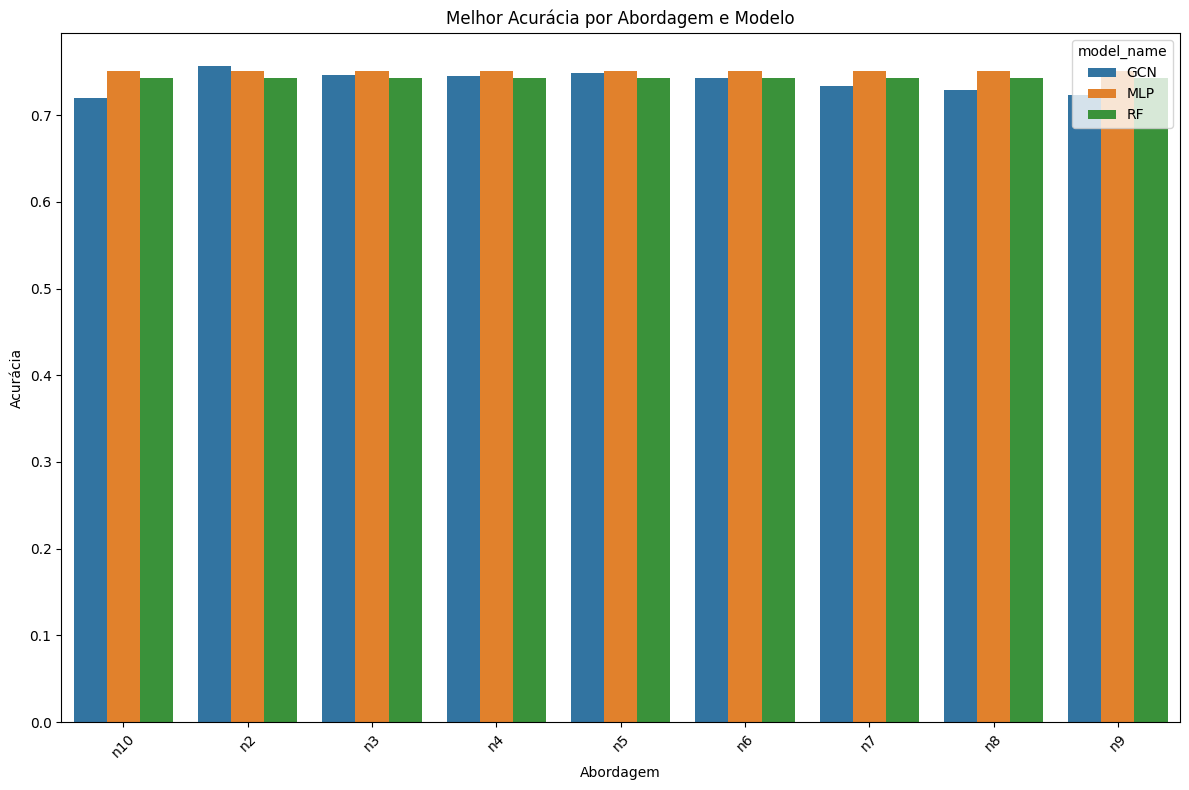

In [25]:
# Agrupar por abordagem e modelo, encontrando a acurácia máxima
best_models = combined_df.groupby(['approach', 'model_name'])['accuracy'].max().reset_index()

# Criar um pivot table para melhor visualização
pivot_best = best_models.pivot(index='approach', columns='model_name', values='accuracy')

# Mostrar os melhores resultados
print("Melhores acurácias por abordagem e modelo:")
print(pivot_best)

# Encontrar para cada abordagem e modelo, o seed que produziu a melhor acurácia
best_configs = []

for approach in combined_df['approach'].unique():
    for model in ['GCN', 'RF', 'MLP']:
        subset = combined_df[(combined_df['approach'] == approach) & (combined_df['model_name'] == model)]
        if not subset.empty:
            best_row = subset.loc[subset['accuracy'].idxmax()]
            best_configs.append({
                'approach': approach,
                'model_name': model,
                'accuracy': best_row['accuracy'],
                'seed': best_row['seed'],
                'datetime': best_row['datetime']
            })

best_configs_df = pd.DataFrame(best_configs)
best_configs_df = best_configs_df.sort_values(['approach', 'model_name'])

print("\nDetalhes das melhores configurações:")
print(best_configs_df)

# Visualização dos resultados
plt.figure(figsize=(12, 8))
sns.barplot(x='approach', y='accuracy', hue='model_name', data=best_configs_df)
plt.title('Melhor Acurácia por Abordagem e Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Abordagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('best_accuracy_by_approach_model.png')
plt.show()